In [31]:
import pandas as pd

store = pd.read_csv("/content/store.csv", low_memory = False)
train = pd.read_csv("/content/train.csv", low_memory = False)

print(store.columns)
print(train.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


both of them contain "store" column

In [32]:
data  = train.merge(store, on = ["Store"], how = "inner")

data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [34]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
data['Date'].dtype

<ipython-input-34-eb69502e5095>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)


dtype('<M8[ns]')

In [35]:
import datetime as dt
import numpy as np

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.isocalendar().week

data['Season'] = np.where(data['Month'].isin([12, 1, 2]), 'Winter',
                      np.where(data['Month'].isin([3, 4, 5]), 'Spring',
                            np.where(data['Month'].isin([6, 7, 8]), 'Summer',
                                  np.where(data['Month'].isin([9, 10, 11]), "Autumn", None))))

print(data[['Year', 'Month', 'Week', 'Day', 'Season']])

         Year  Month  Week  Day  Season
0        2015      7    31   31  Summer
1        2015      7    31   31  Summer
2        2015      7    31   31  Summer
3        2015      7    31   31  Summer
4        2015      7    31   31  Summer
...       ...    ...   ...  ...     ...
1017204  2013      1     1    1  Winter
1017205  2013      1     1    1  Winter
1017206  2013      1     1    1  Winter
1017207  2013      1     1    1  Winter
1017208  2013      1     1    1  Winter

[1017209 rows x 5 columns]


In [36]:
data.isnull().sum() / len(data) * 100

,0
Store,0.000000
DayOfWeek,0.000000
Date,0.000000
Sales,0.000000
Customers,0.000000
Open,0.000000
Promo,0.000000
StateHoliday,0.000000
SchoolHoliday,0.000000
StoreType,0.000000


In [37]:
#Fixing null values
data['CompetitionDistance'].fillna(data['CompetitionDistance'].mode()[0], inplace = True)
data.drop(columns = ["PromoInterval", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceYear", "CompetitionOpenSinceMonth"], axis =1, inplace = True)

data.isna().sum()

<ipython-input-37-ccdec02f48ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CompetitionDistance'].fillna(data['CompetitionDistance'].mode()[0], inplace = True)


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


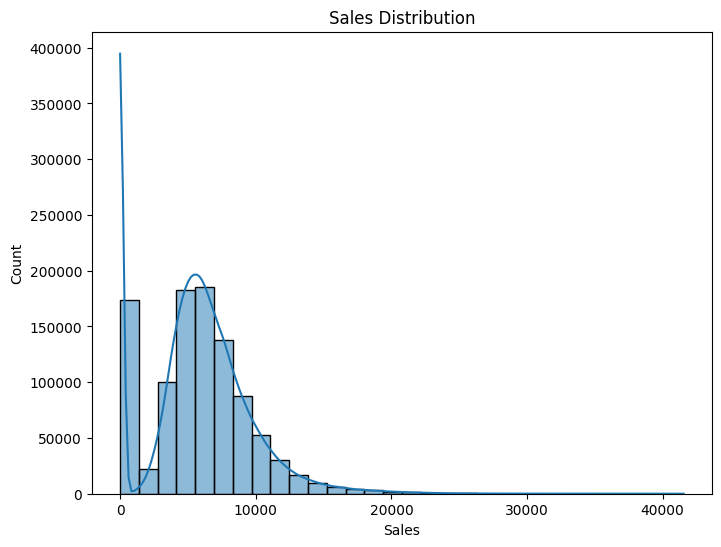

In [38]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], kde=True, bins=30)
plt.title('Sales Distribution')
plt.show()

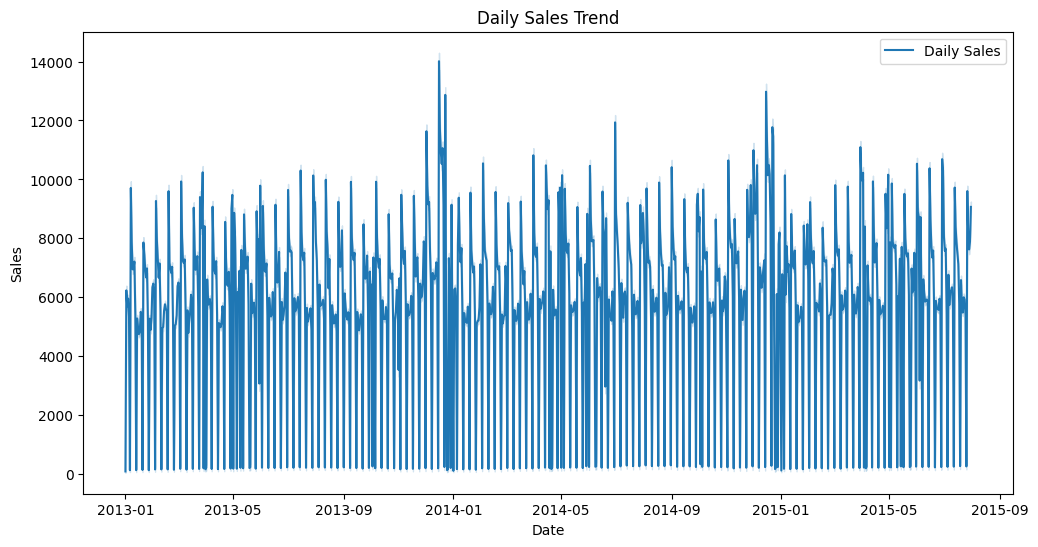

In [44]:
#sales by day
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Sales', label='Daily Sales')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

<ipython-input-46-ff9cf2b5e479>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Year', y='Sales', ci=None, palette='viridis')
<ipython-input-46-ff9cf2b5e479>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Year', y='Sales', ci=None, palette='viridis')


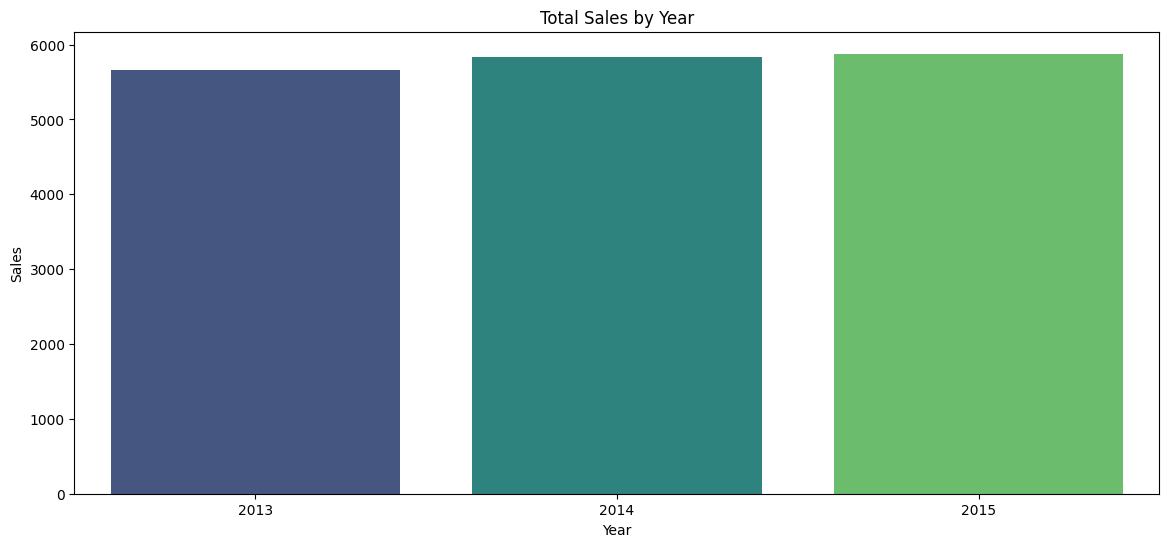

In [46]:
#Sales by Year
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Year', y='Sales', ci=None, palette='viridis')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

<ipython-input-48-c3d0fc395359>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Month', y='Sales', ci=None, palette='coolwarm')
<ipython-input-48-c3d0fc395359>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Month', y='Sales', ci=None, palette='coolwarm')


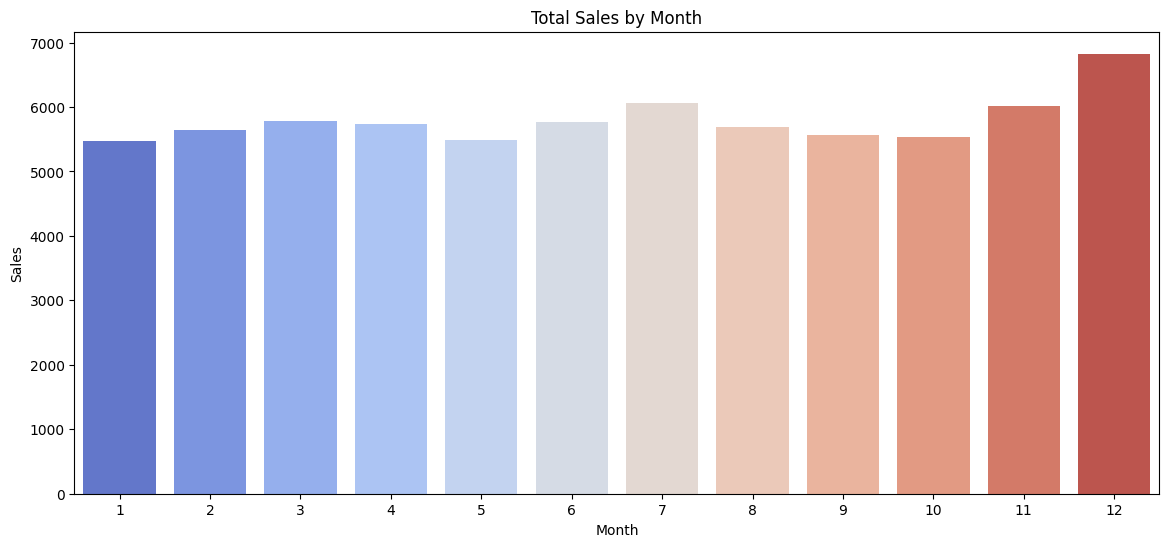

In [48]:
#sales by month
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Month', y='Sales', ci=None, palette='coolwarm')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

<ipython-input-55-7272cc24e91a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='StateHoliday', y='Sales', palette='autumn')


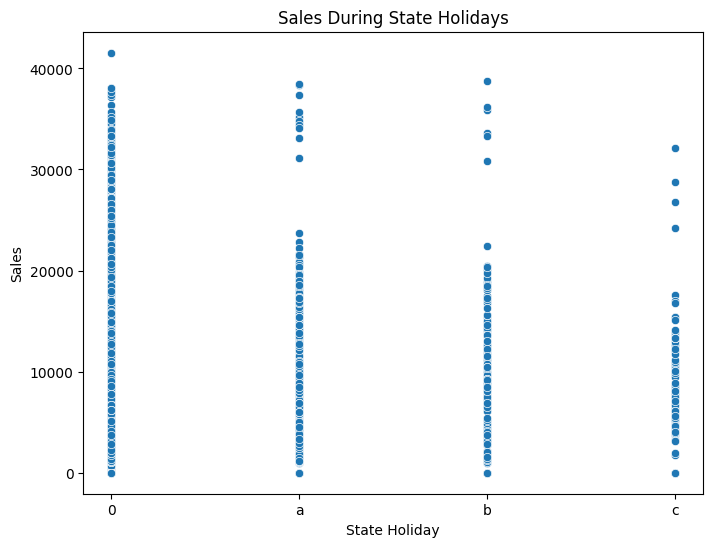

In [55]:
#Affects of holidays
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='StateHoliday', y='Sales', palette='autumn')
plt.title('Sales During State Holidays')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

In [63]:
#Identify and transform object values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical = list(data.select_dtypes(include='object'))
numeric = ["Customers", "Open", "Promo", "Promo2", "SchoolHoliday", "CompetitionDistance"]

def cat(data, col):
  le = LabelEncoder()
  ohe = OneHotEncoder(sparse_output = False)
  transform = le.fit_transform(data[col]).reshape(-1, 1)
  column_name = [col + "_" + str(i) for i in le.classes_]
  return pd.DataFrame(ohe.fit_transform(transform), columns = column_name)

x = data[numeric]

for column in categorical:
  x_data = cat(data, column)
  x = pd.concat([x, x_data], axis = 1)

x

,Customers,Open,Promo,Promo2,SchoolHoliday,CompetitionDistance,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,555,1,1,0,1,1270.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,625,1,1,1,1,570.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,821,1,1,1,1,14130.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1498,1,1,0,1,620.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,559,1,1,0,1,29910.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,1,1,1900.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1017205,0,0,0,0,1,1880.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1017206,0,0,0,0,1,9260.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1017207,0,0,0,0,1,870.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [65]:
from sklearn.model_selection import train_test_split

y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [68]:
#Keras model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mean_squared_error'])
model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 48190300.0000 - mean_squared_error: 48190300.0000 - val_loss: 48290984.0000 - val_mean_squared_error: 48290984.0000
Epoch 2/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 48088508.0000 - mean_squared_error: 48088508.0000 - val_loss: 48290984.0000 - val_mean_squared_error: 48290984.0000
Epoch 3/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - loss: 48154740.0000 - mean_squared_error: 48154740.0000 - val_loss: 48290984.0000 - val_mean_squared_error: 48290984.0000
Epoch 4/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 48088200.0000 - mean_squared_error: 48088200.0000 - val_loss: 48290984.0000 - val_mean_squared_error: 48290984.0000
Epoch 5/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 48238484.0000 - mean_squared_error: 48238484.0000 - val_loss: 48290984.0000 - val_mean_squared_error: 48290984.0000
Epoch 6/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 48252880.0000 - mean_squared_e

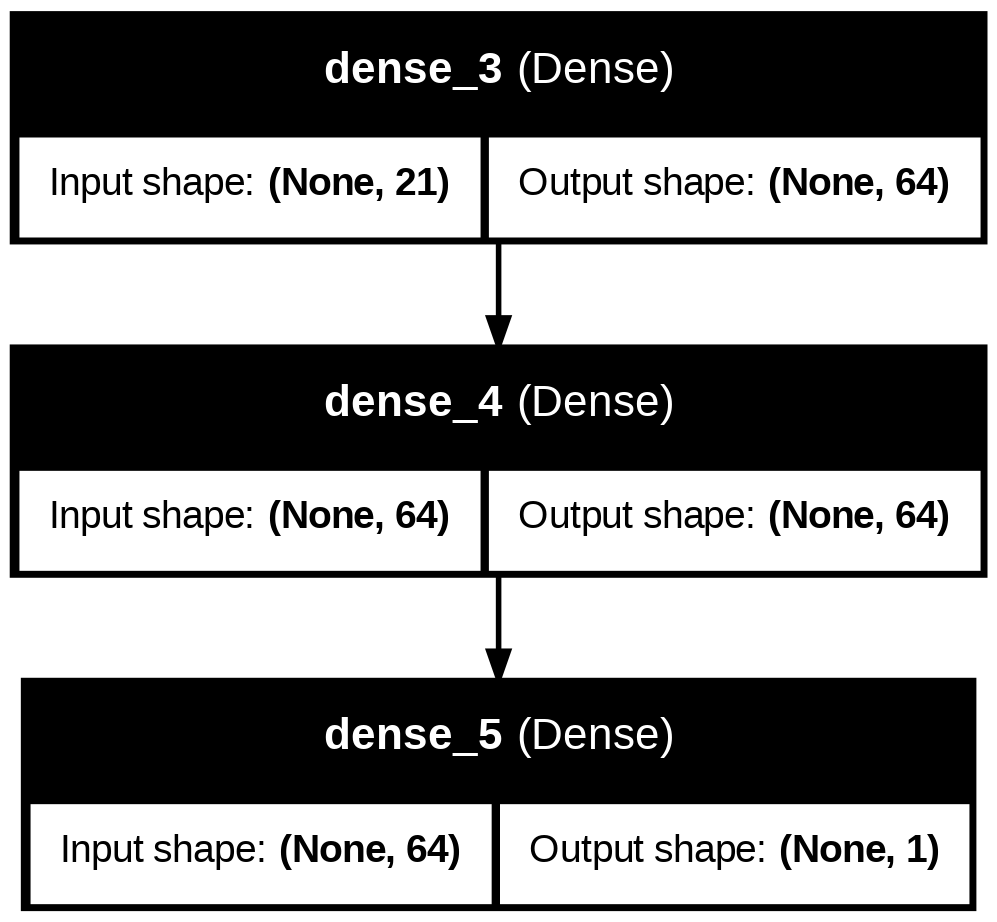

In [69]:
#Visualize model

from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [70]:
#Standardize and make predicts

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
y_train = sc.fit_transform(y_train.values.reshape(-1, 1))
y_test = sc.transform(y_test.values.reshape(-1, 1))

pred = model.predict(x_test)
pred = sc.inverse_transform(pred)
y_test = sc.inverse_transform(y_test)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


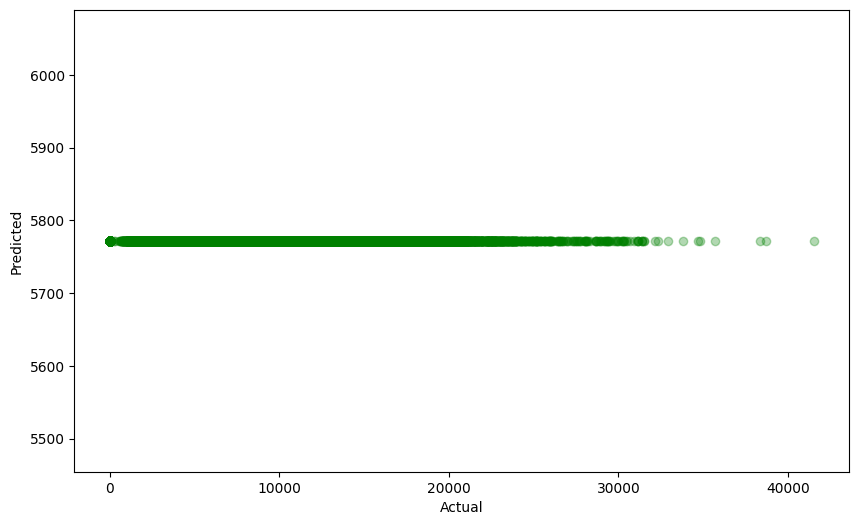

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.3, color = 'green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()